In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [7]:
# Financial data (in millions USD except per share data)
years = [2020, 2021, 2022, 2023, 2024]
total_assets = [52148, 62131, 82338, 106618, 122070]
total_liabilities = [28469, 30548, 36440, 43009, 48390]
total_equity = [23679, 31583, 45898, 63609, 73680]

# Create DataFrame for easier manipulation
data = pd.DataFrame({
    'Year': years,
    'Assets': total_assets,
    'Liabilities': total_liabilities,
    'Equity': total_equity
})

print("Financial Data Summary:")
print(data)


Financial Data Summary:
   Year  Assets  Liabilities  Equity
0  2020   52148        28469   23679
1  2021   62131        30548   31583
2  2022   82338        36440   45898
3  2023  106618        43009   63609
4  2024  122070        48390   73680


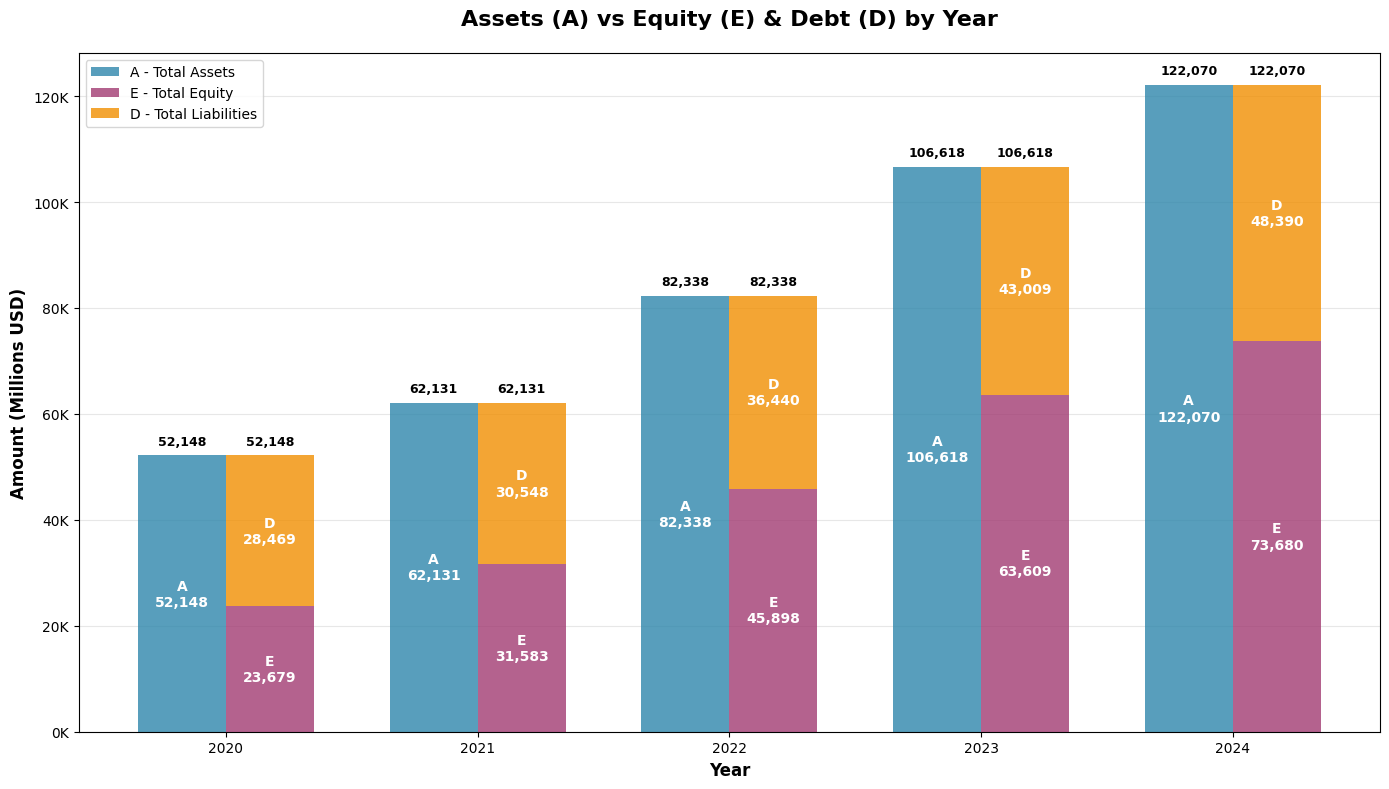

In [8]:
# Create bar chart with 2 bars per year
fig, ax = plt.subplots(figsize=(14, 8))

# Set up x positions for bars
x_years = np.array(years)
width = 0.35  # Width of bars
x_pos1 = x_years - width/2  # Position for assets bars
x_pos2 = x_years + width/2  # Position for stacked equity+debt bars

# Create bars
# First bar: Assets (A)
assets_bars = ax.bar(x_pos1, total_assets, width, label='A - Total Assets', 
                    color='#2E86AB', alpha=0.8)

# Second bar: Stacked Equity and Debt
equity_bars = ax.bar(x_pos2, total_equity, width, label='E - Total Equity', 
                    color='#A23B72', alpha=0.8)
debt_bars = ax.bar(x_pos2, total_liabilities, width, bottom=total_equity, 
                  label='D - Total Liabilities', color='#F18F01', alpha=0.8)

# Customize the chart
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Amount (Millions USD)', fontsize=12, fontweight='bold')
ax.set_title('Assets (A) vs Equity (E) & Debt (D) by Year', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x_years)
ax.legend(loc='upper left', fontsize=10)

# Add labels inside bars
for i, (assets_bar, equity_bar, debt_bar) in enumerate(zip(assets_bars, equity_bars, debt_bars)):
    # Assets bar - Add "A" label and value
    ax.text(assets_bar.get_x() + assets_bar.get_width()/2, 
            assets_bar.get_height()/2,
            f'A\n{total_assets[i]:,}', 
            ha='center', va='center', fontsize=10, fontweight='bold', color='white')
    
    # Equity bar - Add "E" label and value
    ax.text(equity_bar.get_x() + equity_bar.get_width()/2, 
            equity_bar.get_height()/2,
            f'E\n{total_equity[i]:,}', 
            ha='center', va='center', fontsize=10, fontweight='bold', color='white')
    
    # Debt bar - Add "D" label and value
    ax.text(debt_bar.get_x() + debt_bar.get_width()/2, 
            total_equity[i] + debt_bar.get_height()/2,
            f'D\n{total_liabilities[i]:,}', 
            ha='center', va='center', fontsize=10, fontweight='bold', color='white')

# Add value labels on top of bars for totals
for i, (assets_bar, debt_bar) in enumerate(zip(assets_bars, debt_bars)):
    # Total assets value on top of assets bar
    ax.text(assets_bar.get_x() + assets_bar.get_width()/2, 
            assets_bar.get_height() + 1500,
            f'{total_assets[i]:,}', 
            ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Total equity + debt value on top of stacked bar
    total_equity_debt = total_equity[i] + total_liabilities[i]
    ax.text(debt_bar.get_x() + debt_bar.get_width()/2, 
            total_equity_debt + 1500,
            f'{total_equity_debt:,}', 
            ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add grid for better readability
ax.grid(True, alpha=0.3, axis='y')
ax.set_axisbelow(True)

# Format y-axis to show values in thousands
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))

plt.tight_layout()
plt.show()


In [9]:
# Verify accounting equation: Assets = Liabilities + Equity
print("Verification of Accounting Equation (Assets = Liabilities + Equity):")
print("=" * 60)

for i, year in enumerate(years):
    calculated_assets = total_liabilities[i] + total_equity[i]
    difference = total_assets[i] - calculated_assets
    
    print(f"{year}: Assets = {total_assets[i]:,}, Liabilities + Equity = {calculated_assets:,}, Difference = {difference:,}")

print("\nAll values should have 0 difference if the accounting equation holds.")


Verification of Accounting Equation (Assets = Liabilities + Equity):
2020: Assets = 52,148, Liabilities + Equity = 52,148, Difference = 0
2021: Assets = 62,131, Liabilities + Equity = 62,131, Difference = 0
2022: Assets = 82,338, Liabilities + Equity = 82,338, Difference = 0
2023: Assets = 106,618, Liabilities + Equity = 106,618, Difference = 0
2024: Assets = 122,070, Liabilities + Equity = 122,070, Difference = 0

All values should have 0 difference if the accounting equation holds.


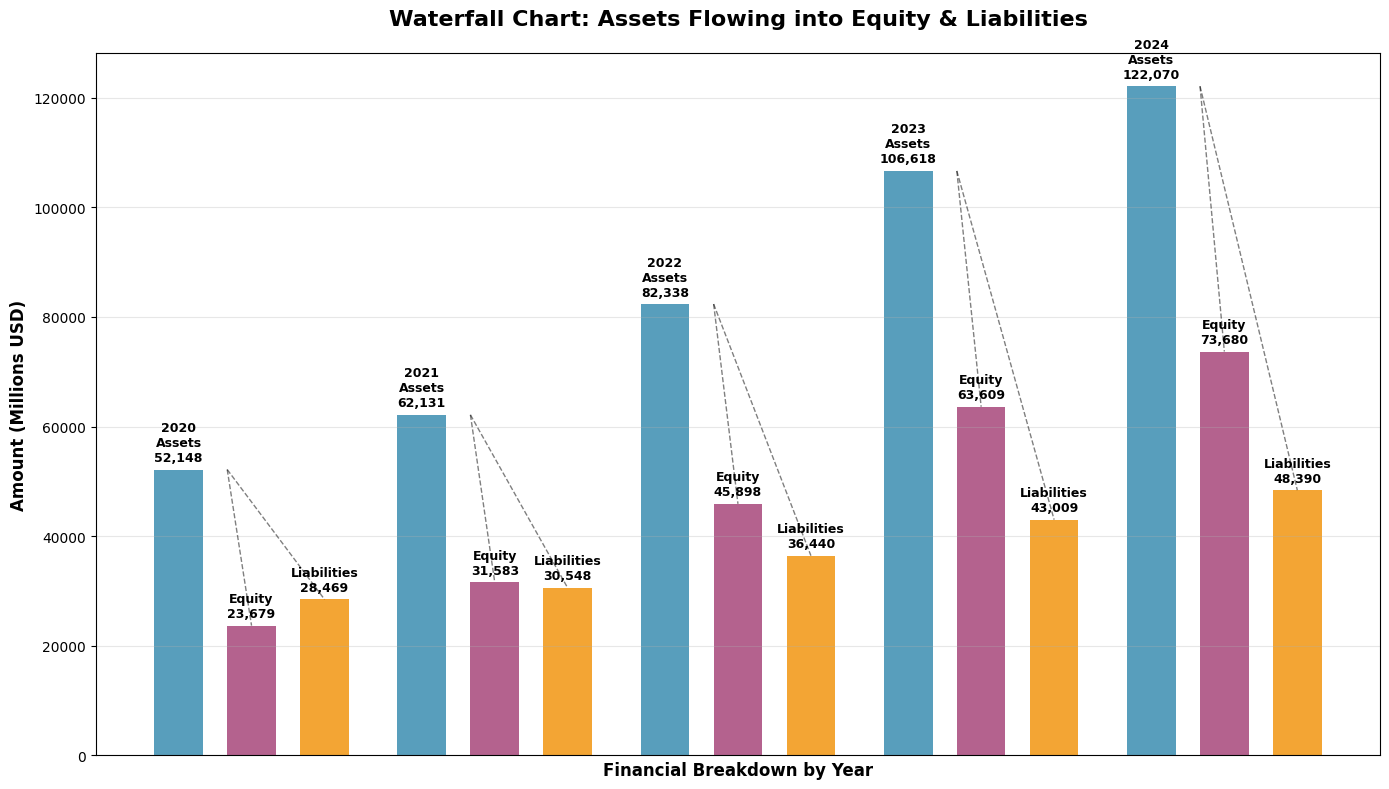

In [11]:
# 1. WATERFALL CHART - Show how Assets flow into Liabilities and Equity
fig, ax = plt.subplots(figsize=(14, 8))

# Create waterfall chart for each year
x_positions = []
y_positions = []
colors = []
labels = []
widths = []

for i, year in enumerate(years):
    base_x = i * 4  # Space between years
    
    # Assets bar (starting point)
    x_positions.append(base_x)
    y_positions.append(total_assets[i])
    colors.append('#2E86AB')
    labels.append(f'{year}\nAssets\n{total_assets[i]:,}')
    widths.append(0.8)
    
    # Equity portion (first part of breakdown)
    x_positions.append(base_x + 1.2)
    y_positions.append(total_equity[i])
    colors.append('#A23B72')
    labels.append(f'Equity\n{total_equity[i]:,}')
    widths.append(0.8)
    
    # Liabilities portion (second part of breakdown)
    x_positions.append(base_x + 2.4)
    y_positions.append(total_liabilities[i])
    colors.append('#F18F01')
    labels.append(f'Liabilities\n{total_liabilities[i]:,}')
    widths.append(0.8)

# Create the bars
bars = ax.bar(x_positions, y_positions, width=widths, color=colors, alpha=0.8)

# Add connecting lines to show the flow
for i in range(len(years)):
    base_x = i * 4
    asset_height = total_assets[i]
    
    # Line from Assets to Equity
    ax.plot([base_x + 0.8, base_x + 1.2], [asset_height, total_equity[i]], 
            'k--', alpha=0.5, linewidth=1)
    
    # Line from Assets to Liabilities  
    ax.plot([base_x + 0.8, base_x + 2.4], [asset_height, total_liabilities[i]], 
            'k--', alpha=0.5, linewidth=1)

# Customize
ax.set_title('Waterfall Chart: Assets Flowing into Equity & Liabilities', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Amount (Millions USD)', fontsize=12, fontweight='bold')
ax.set_xlabel('Financial Breakdown by Year', fontsize=12, fontweight='bold')

# Add labels on bars
for bar, label in zip(bars, labels):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1000,
            label, ha='center', va='bottom', fontsize=9, fontweight='bold')

ax.grid(True, alpha=0.3, axis='y')
plt.xticks([])  # Remove x-axis labels since we have custom labels
plt.tight_layout()
plt.show()


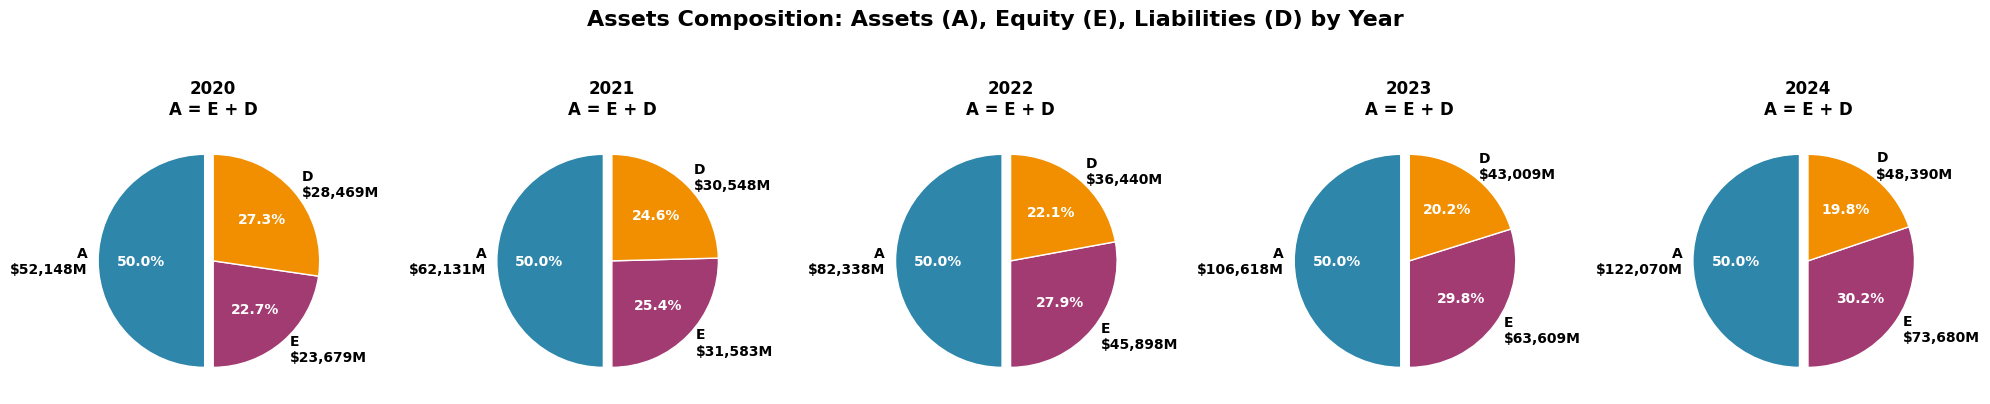

In [18]:
# 2. PIE CHART EVOLUTION - Show Assets, Equity, and Liabilities composition over time

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle('Assets Composition: Assets (A), Equity (E), Liabilities (D) by Year', 
             fontsize=16, fontweight='bold', y=1.05)

colors = ['#2E86AB', '#A23B72', '#F18F01']  # Assets (blue), Equity (purple), Liabilities (orange)

for i, (year, ax) in enumerate(zip(years, axes)):
    # Data for pie chart (Assets, Equity, Liabilities)
    # Assets = Equity + Liabilities, so show all three as slices
    asset = total_assets[i]
    equity = total_equity[i]
    liabilities = total_liabilities[i]
    # To show all three, we can show: [Equity, Liabilities, (Assets - Equity - Liabilities)]
    # But Assets = Equity + Liabilities, so Assets slice is the whole, and E/D are parts.
    # Instead, show all three for visual clarity, but Assets = E+D, so E and D are parts of A.
    # We'll show all three, but the Assets slice will be a ring around E and D.
    # For a simple pie, just show all three as slices (even if A = E+D).
    sizes = [asset, equity, liabilities]
    labels = [
        f'A\n${asset:,}M', 
        f'E\n${equity:,}M', 
        f'D\n${liabilities:,}M'
    ]
    # To avoid confusion, make the Assets slice a little exploded
    explode = [0.08, 0, 0]

    wedges, texts, autotexts = ax.pie(
        sizes, 
        labels=labels, 
        colors=colors, 
        autopct='%1.1f%%',
        startangle=90, 
        textprops={'fontsize': 10, 'fontweight': 'bold'},
        explode=explode,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
    )
    
    # Customize
    ax.set_title(f'{year}\nA = E + D', 
                 fontsize=12, fontweight='bold', pad=10)
    
    # Make percentage text white and bold
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(10)

plt.tight_layout()
plt.show()


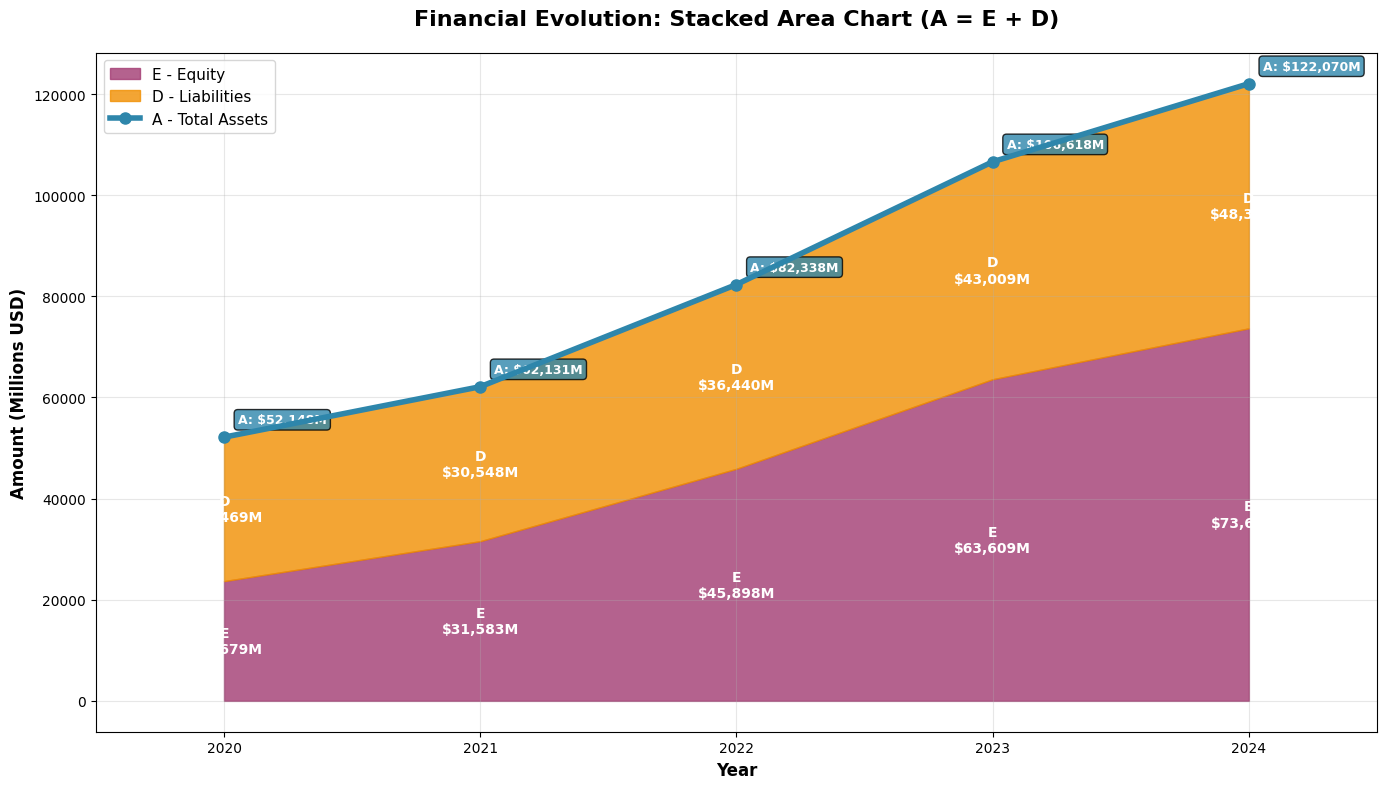

In [13]:
# 3. STACKED AREA CHART - Show evolution over time
fig, ax = plt.subplots(figsize=(14, 8))

# Create stacked area chart
ax.fill_between(years, 0, total_equity, color='#A23B72', alpha=0.8, label='E - Equity')
ax.fill_between(years, total_equity, 
                [eq + liab for eq, liab in zip(total_equity, total_liabilities)], 
                color='#F18F01', alpha=0.8, label='D - Liabilities')

# Add line for total assets
ax.plot(years, total_assets, color='#2E86AB', linewidth=4, marker='o', 
        markersize=8, label='A - Total Assets', zorder=5)

# Add value annotations
for i, year in enumerate(years):
    # Total assets point
    ax.annotate(f'A: ${total_assets[i]:,}M', 
                xy=(year, total_assets[i]), 
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='#2E86AB', alpha=0.8),
                color='white', fontweight='bold', fontsize=9)
    
    # Equity midpoint
    equity_mid = total_equity[i] / 2
    ax.text(year, equity_mid, f'E\n${total_equity[i]:,}M', 
            ha='center', va='center', fontweight='bold', 
            color='white', fontsize=10)
    
    # Liabilities midpoint
    liab_mid = total_equity[i] + (total_liabilities[i] / 2)
    ax.text(year, liab_mid, f'D\n${total_liabilities[i]:,}M', 
            ha='center', va='center', fontweight='bold', 
            color='white', fontsize=10)

# Customize
ax.set_title('Financial Evolution: Stacked Area Chart (A = E + D)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Amount (Millions USD)', fontsize=12, fontweight='bold')
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xlim(2019.5, 2024.5)

plt.tight_layout()
plt.show()


ValueError: operands could not be broadcast together with shapes (5,) (100,) 

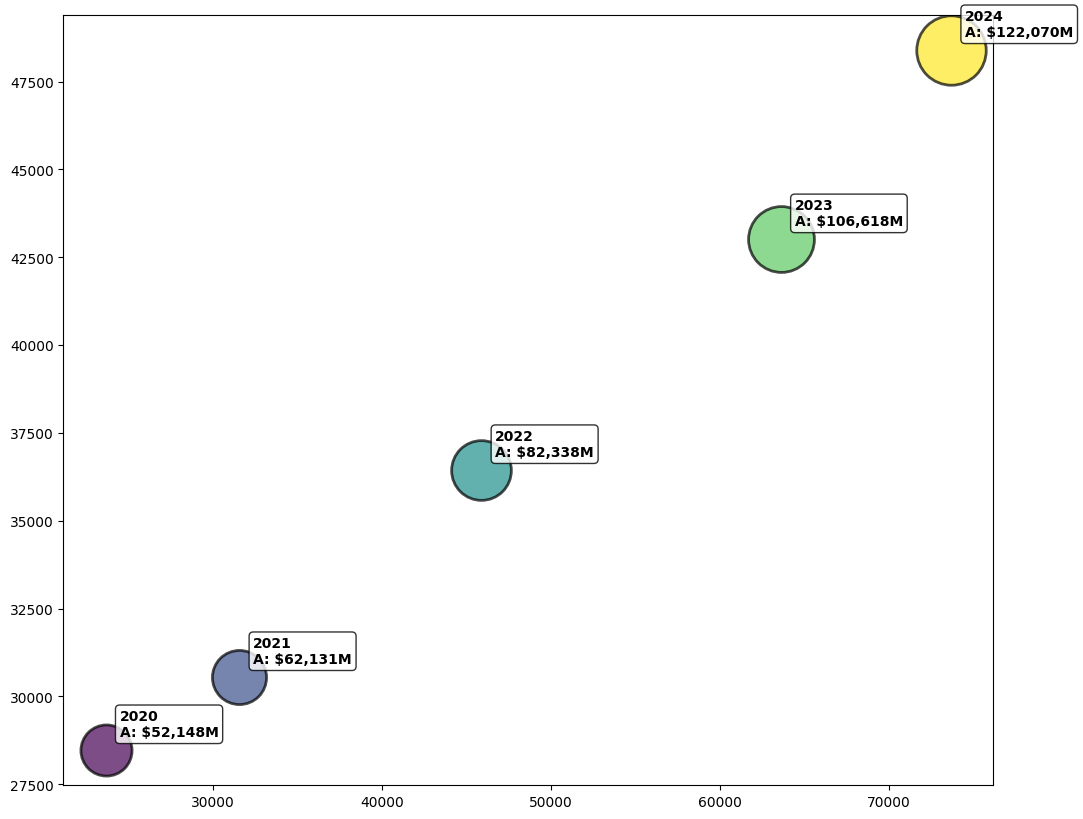

In [14]:
# 4. BUBBLE CHART - Assets as bubble size, Equity vs Liabilities
fig, ax = plt.subplots(figsize=(12, 10))

# Normalize bubble sizes (assets)
max_assets = max(total_assets)
bubble_sizes = [(asset/max_assets) * 2000 + 500 for asset in total_assets]

# Create color map for years
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))

# Create bubble chart
for i, year in enumerate(years):
    bubble = ax.scatter(total_equity[i], total_liabilities[i], 
                       s=bubble_sizes[i], c=[colors[i]], 
                       alpha=0.7, edgecolors='black', linewidth=2)
    
    # Add year labels
    ax.annotate(f'{year}\nA: ${total_assets[i]:,}M', 
                xy=(total_equity[i], total_liabilities[i]),
                xytext=(10, 10), textcoords='offset points',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Add diagonal line showing the accounting equation relationship
max_val = max(max(total_equity), max(total_liabilities))
x_line = np.linspace(0, max_val, 100)
y_line = np.array(total_assets) - x_line  # A = E + D, so D = A - E

# Customize
ax.set_xlabel('E - Equity (Millions USD)', fontsize=12, fontweight='bold')
ax.set_ylabel('D - Liabilities (Millions USD)', fontsize=12, fontweight='bold')
ax.set_title('Bubble Chart: Financial Relationship\n(Bubble Size = Assets)', 
             fontsize=16, fontweight='bold', pad=20)

# Add legend for bubble sizes
legend_elements = []
for i, year in enumerate(years):
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', 
                                     markerfacecolor=colors[i], markersize=10,
                                     label=f'{year}'))

ax.legend(handles=legend_elements, loc='upper right', title='Year')
ax.grid(True, alpha=0.3)

# Add explanatory text
ax.text(0.02, 0.98, 'Bubble Size ∝ Total Assets\nX-axis: Equity\nY-axis: Liabilities', 
        transform=ax.transAxes, fontsize=11, 
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8),
        verticalalignment='top')

plt.tight_layout()
plt.show()


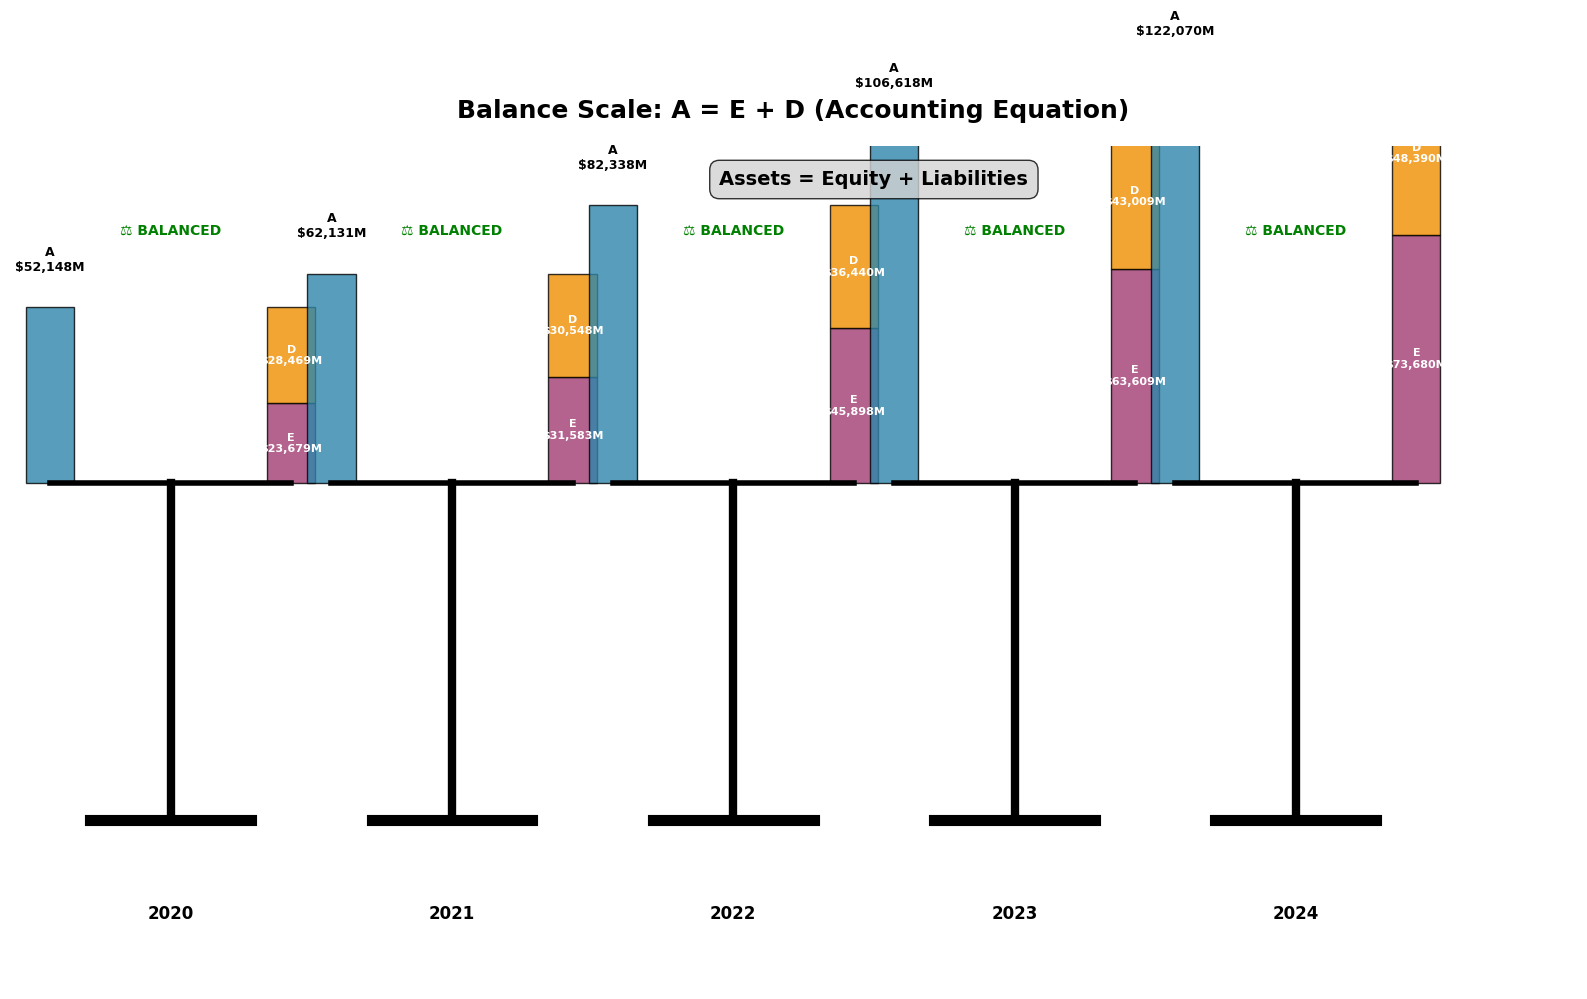

In [15]:
# 5. BALANCE SCALE VISUALIZATION - Creative representation of accounting equation
fig, ax = plt.subplots(figsize=(16, 10))

# Create balance scale for each year
for i, year in enumerate(years):
    base_x = i * 3.5
    
    # Draw balance scale base
    ax.plot([base_x-1, base_x+1], [0, 0], 'k-', linewidth=8)  # Base
    ax.plot([base_x, base_x], [0, 2], 'k-', linewidth=6)      # Pole
    ax.plot([base_x-1.5, base_x+1.5], [2, 2], 'k-', linewidth=4)  # Balance beam
    
    # Left side: Assets
    asset_height = total_assets[i] / 50000  # Scale down for visualization
    ax.add_patch(plt.Rectangle((base_x-1.8, 2), 0.6, asset_height, 
                              facecolor='#2E86AB', alpha=0.8, edgecolor='black'))
    ax.text(base_x-1.5, 2 + asset_height + 0.2, f'A\n${total_assets[i]:,}M', 
            ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # Right side: Equity + Liabilities (stacked)
    equity_height = total_equity[i] / 50000
    liab_height = total_liabilities[i] / 50000
    
    # Equity (bottom)
    ax.add_patch(plt.Rectangle((base_x+1.2, 2), 0.6, equity_height, 
                              facecolor='#A23B72', alpha=0.8, edgecolor='black'))
    ax.text(base_x+1.5, 2 + equity_height/2, f'E\n${total_equity[i]:,}M', 
            ha='center', va='center', fontweight='bold', fontsize=8, color='white')
    
    # Liabilities (top)
    ax.add_patch(plt.Rectangle((base_x+1.2, 2 + equity_height), 0.6, liab_height, 
                              facecolor='#F18F01', alpha=0.8, edgecolor='black'))
    ax.text(base_x+1.5, 2 + equity_height + liab_height/2, f'D\n${total_liabilities[i]:,}M', 
            ha='center', va='center', fontweight='bold', fontsize=8, color='white')
    
    # Year label
    ax.text(base_x, -0.5, f'{year}', ha='center', va='top', 
            fontsize=12, fontweight='bold')
    
    # Balance indicator (should be equal)
    total_right = equity_height + liab_height
    if abs(asset_height - total_right) < 0.1:  # Balanced
        ax.text(base_x, 3.5, '⚖️ BALANCED', ha='center', va='center', 
                fontsize=10, fontweight='bold', color='green')

# Customize
ax.set_xlim(-2, len(years) * 3.5)
ax.set_ylim(-1, 4)
ax.set_title('Balance Scale: A = E + D (Accounting Equation)', 
             fontsize=18, fontweight='bold', pad=20)
ax.axis('off')  # Remove axes for cleaner look

# Add equation at the top
ax.text(len(years) * 1.75, 3.8, 'Assets = Equity + Liabilities', 
        ha='center', va='center', fontsize=14, fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()


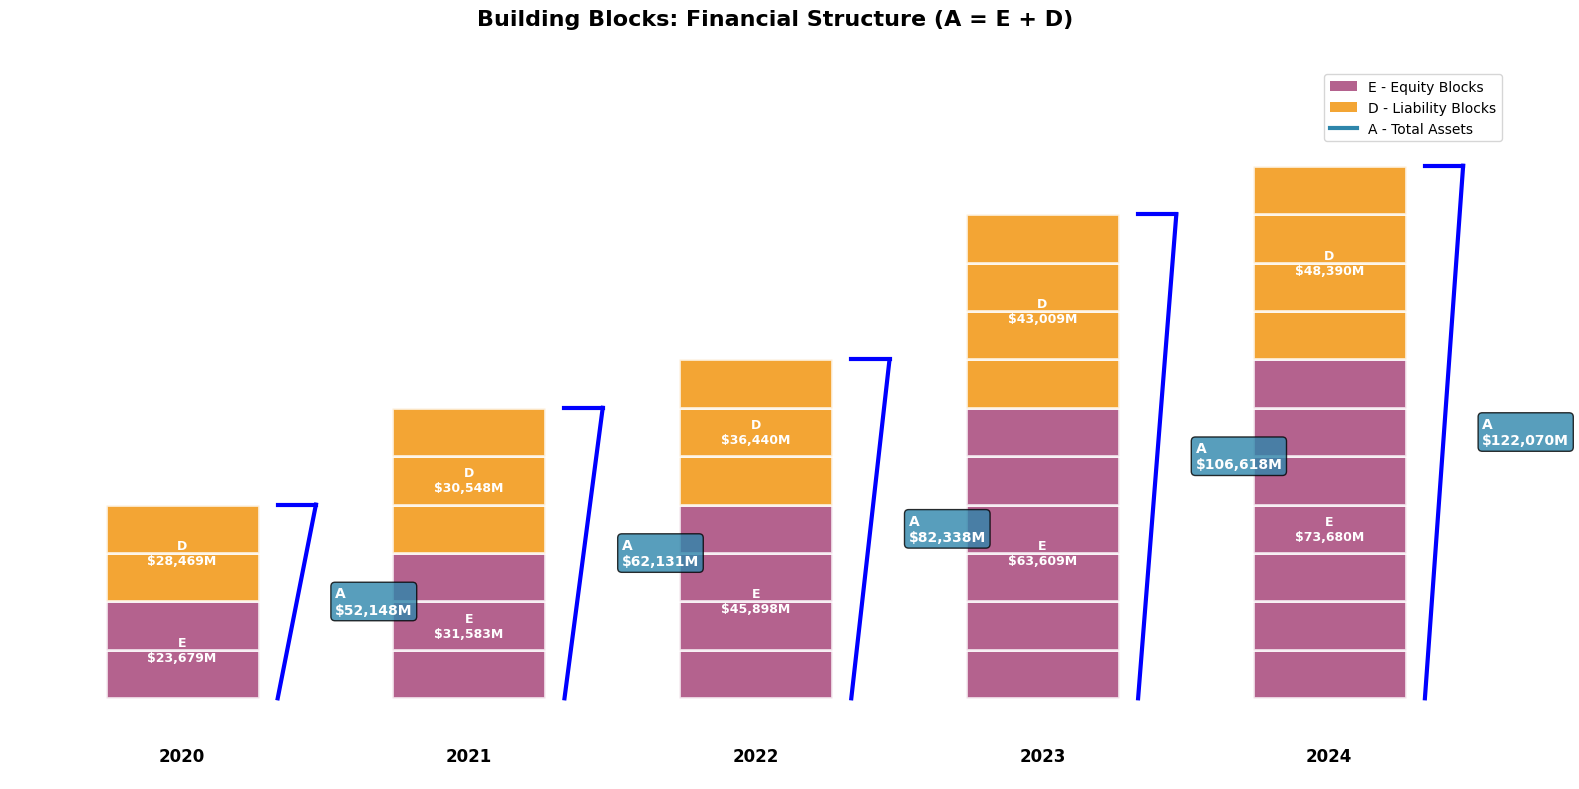

In [16]:
# 6. BUILDING BLOCKS VISUALIZATION - Lego-style stacked representation
fig, ax = plt.subplots(figsize=(16, 8))

block_width = 0.8
spacing = 1.5

for i, year in enumerate(years):
    base_x = i * spacing
    
    # Calculate number of blocks for each component (scale down)
    equity_blocks = max(1, int(total_equity[i] / 10000))
    liab_blocks = max(1, int(total_liabilities[i] / 10000))
    
    current_y = 0
    
    # Draw Equity blocks (bottom)
    for block in range(equity_blocks):
        rect = plt.Rectangle((base_x, current_y), block_width, 0.3, 
                           facecolor='#A23B72', alpha=0.8, edgecolor='white', linewidth=2)
        ax.add_patch(rect)
        current_y += 0.3
    
    # Add E label in middle of equity blocks
    equity_mid_y = (equity_blocks * 0.3) / 2
    ax.text(base_x + block_width/2, equity_mid_y, f'E\n${total_equity[i]:,}M', 
            ha='center', va='center', fontweight='bold', fontsize=9, color='white')
    
    # Draw Liabilities blocks (top)
    for block in range(liab_blocks):
        rect = plt.Rectangle((base_x, current_y), block_width, 0.3, 
                           facecolor='#F18F01', alpha=0.8, edgecolor='white', linewidth=2)
        ax.add_patch(rect)
        current_y += 0.3
    
    # Add D label in middle of liability blocks
    liab_mid_y = equity_blocks * 0.3 + (liab_blocks * 0.3) / 2
    ax.text(base_x + block_width/2, liab_mid_y, f'D\n${total_liabilities[i]:,}M', 
            ha='center', va='center', fontweight='bold', fontsize=9, color='white')
    
    # Total assets indicator
    total_height = current_y
    ax.plot([base_x + block_width + 0.1, base_x + block_width + 0.3], 
            [0, total_height], 'b-', linewidth=3)
    ax.plot([base_x + block_width + 0.1, base_x + block_width + 0.3], 
            [total_height, total_height], 'b-', linewidth=3)
    ax.text(base_x + block_width + 0.4, total_height/2, f'A\n${total_assets[i]:,}M', 
            ha='left', va='center', fontweight='bold', fontsize=10, 
            bbox=dict(boxstyle='round,pad=0.3', facecolor='#2E86AB', alpha=0.8),
            color='white')
    
    # Year label
    ax.text(base_x + block_width/2, -0.3, f'{year}', ha='center', va='top', 
            fontsize=12, fontweight='bold')

# Customize
ax.set_xlim(-0.5, len(years) * spacing)
ax.set_ylim(-0.5, 4)
ax.set_title('Building Blocks: Financial Structure (A = E + D)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Each block represents ~$10B', fontsize=11, style='italic')
ax.axis('off')

# Add legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, facecolor='#A23B72', alpha=0.8, label='E - Equity Blocks'),
    plt.Rectangle((0, 0), 1, 1, facecolor='#F18F01', alpha=0.8, label='D - Liability Blocks'),
    plt.Line2D([0], [0], color='#2E86AB', linewidth=3, label='A - Total Assets')
]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.98, 0.98))

plt.tight_layout()
plt.show()
